<a href="https://colab.research.google.com/github/WittmannF/udemy-deep-learning-cnns/blob/main/assignment_cnn_preenchido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: Fashion MNIST
Now it is your turn! You are going to use the same methods presented in the previous video in order to classify clothes from a black and white dataset of images (image by Zalando, MIT License):
![](https://tensorflow.org/images/fashion-mnist-sprite.png)

The class labels are:
```
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot
```

### 1. Preparing the input data
Let's first import the dataset. It is available on [tensorflow.keras.datasets](https://keras.io/datasets/):

In [1]:
import tensorflow
fashion_mnist = tensorflow.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print("Shape of the training set: {}".format(X_train.shape))
print("Shape of the test set: {}".format(X_test.shape))

Shape of the training set: (60000, 28, 28)
Shape of the test set: (10000, 28, 28)


In [3]:
# TODO: Normalize the training and testing set using standardization
def normalize(x,m,s):
    return (x-m)/s

train_mean = X_train.mean()
train_std = X_train.std()

X_train = normalize(X_train, train_mean, train_std)
X_test = normalize(X_test, train_mean, train_std)


In [4]:
print(f'Training Mean after standardization {X_train.mean():.3f}')
print(f'Training Std after standardization {X_train.std():.3f}')
print(f'Test Mean after standardization {X_test.mean():.3f}')
print(f'Test Std after standardization {X_test.std():.3f}')

Training Mean after standardization -0.000
Training Std after standardization 1.000
Test Mean after standardization 0.002
Test Std after standardization 0.998


### 2. Training with fully connected layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4515 - accuracy: 0.8380 - val_loss: 0.4077 - val_accuracy: 0.8497
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3473 - accuracy: 0.8720 - val_loss: 0.3933 - val_accuracy: 0.8556


### 3. Extending to CNNs
Now your goal is to develop an architecture that can reach a test accuracy higher than 0.85.

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# TODO: Reshape the dataset in order to add the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(6, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(),
    Conv2D(16, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               205312    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
hist=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 3ms/step - loss: 0.4505 - accuracy: 0.8368 - val_loss: 0.3674 - val_accuracy: 0.8636
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3198 - accuracy: 0.8812 - val_loss: 0.3373 - val_accuracy: 0.8787
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2808 - accuracy: 0.8971 - val_loss: 0.3061 - val_accuracy: 0.8911
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9064 - val_loss: 0.3113 - val_accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2270 - accuracy: 0.9147 - val_loss: 0.2970 - val_accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2039 - accuracy: 0.9232 - val_loss: 0.2721 - val_accuracy: 0.9022
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1843 - accuracy: 0.9305 - val_loss: 0.2746 - val_accuracy

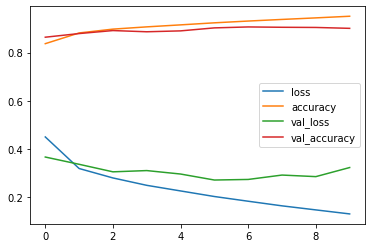

In [11]:
import pandas as pd
pd.DataFrame(hist.history).plot()

### 4. Visualizing Predictions

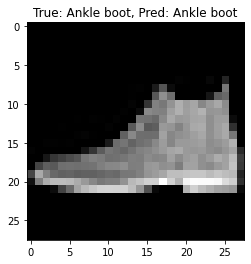

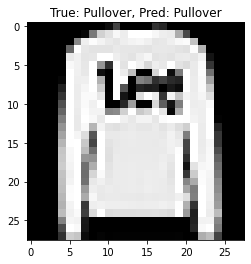

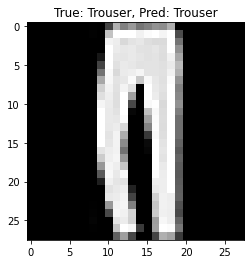

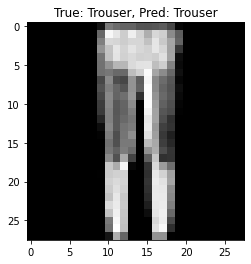

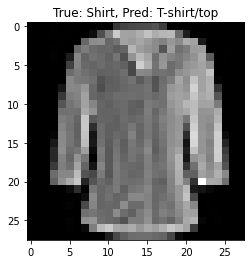

In [12]:
import numpy as np
import matplotlib.pyplot as plt

label_names = {0:"T-shirt/top",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle boot"}

# Index to be visualized
for idx in range(5):
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    out = model.predict(X_test[idx].reshape(1,28,28,1))
    plt.title("True: {}, Pred: {}".format(label_names[y_test[idx]], label_names[np.argmax(out)]))
    plt.show()